# Creating Customer Segments

### Unsupervised Learning

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

**Description of Categories**
- FRESH: annual spending (m.u.) on fresh products (Continuous)
- MILK: annual spending (m.u.) on milk products (Continuous)
- GROCERY: annual spending (m.u.) on grocery products (Continuous)
- FROZEN: annual spending (m.u.)on frozen products (Continuous) 
- DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
- DELICATESSEN: annual spending (m.u.) on and delicatessen products (Continuous)
    - "A store selling cold cuts, cheeses, and a variety of salads, as well as a selection of unusual or foreign prepared foods."


In [155]:
# Import necessary libraries
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import renders as rs
%matplotlib inline
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings('ignore')

#### **Task 1: Import Dataset and create a copy of that dataset**

In [2]:
# Write code here
data = pd.read_csv('customers.csv')
df = data.copy()
df.shape

(440, 8)

**Task 2: Drop Region and Channel column**

In [3]:
# Write code here
df.drop(['Region','Channel'], axis=1,inplace=True)

**Task 3: Display first five rows** 

In [4]:
# Write code here
df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


#### **Task 4: Display last five rows** 

In [5]:
# Write code here
df.tail()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125
439,2787,1698,2510,65,477,52


#### **Task 5: Check the number of rows and columns**

In [6]:
# Write code here
print(f'Number of rows = {df.shape[0]}')
print(f'Number of columns = {df.shape[1]}')

Number of rows = 440
Number of columns = 6


#### **Task 6: Check data types of all columns**

In [7]:
# Write code here
df.dtypes

Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicatessen        int64
dtype: object

**Task 7: Check for missing values and fill missing values if required.**

In [8]:
# Write code here
df.isnull().sum()

Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicatessen        0
dtype: int64

## Data Exploration

#### **Task 8: Check summary statistics and store the resultant DataFrame in a new variable named *stats***

In [9]:
# Write code here
stats = df.describe()
stats

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.00,440.00,440.00,440.00,440.00,440.00
mean,12000.30,5796.27,7951.28,3071.93,2881.49,1524.87
std,12647.33,7380.38,9503.16,4854.67,4767.85,2820.11
min,3.00,55.00,3.00,25.00,3.00,3.00
25%,3127.75,1533.00,2153.00,742.25,256.75,408.25
50%,8504.00,3627.00,4755.50,1526.00,816.50,965.50
75%,16933.75,7190.25,10655.75,3554.25,3922.00,1820.25
max,112151.00,73498.00,92780.00,60869.00,40827.00,47943.00


**Question: Explain the summary statistics for the above data set**

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue"> The dataset has **440 observations** for each of the six features. </font>

> * <font face="Comic sans MS" size="3" color="blue"> There is considerable difference between **Mean** and **Median**, more over **first** and **third quartiles** are also not close to each other. which means, **non** of the attributes are **normally distributed**.  </font>

> * <font face="Comic sans MS" size="3" color="blue"> Further more, for all six attributes, **Mean** is **Greater** than **Median** .. which indicates that there is **possibility of positive skewness** for all attributes.  </font>

### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

**Logic in selecting the 3 samples: Quartiles**
- As you can previously (in the object "stats"), we've the data showing the first and third quartiles.
- We can filter samples that are starkly different based on the quartiles.
    - This way we've two establishments that belong in the first and third quartiles respectively in, for example, the Frozen category.

**Task 9: Select any random sample and assign the list to given variable**

In [11]:
# Write code here ,  

# this isn't working by the way:P (code is working but way isnt optimal, too much hit and trail)
# its better to take anything randomly and quickly, using pandas random function

Frozen1 = df['Fresh'].quantile(0.25) # take first quartile of Fresh
Frozen3 = df['Fresh'].quantile(0.75) # take third quartile of Fresh
fresh3 = df['Frozen'].quantile(0.75) # # take thirf quartile of Frozen

first = (df['Fresh'] - Frozen1).abs().idxmin()  #get index of row, where Fresh value is closest to first quartile
second = (df['Fresh'] - Frozen3).abs().idxmin() #get index of row, where Fresh value is closest to third quartile
third = (df['Frozen'] - fresh3).abs().idxmin() # #get index of row, where Frozen value is closest to third quartile



indices = [first, second, third] #all three indexes 
indices

[376, 328, 201]

These samples will be separated into another dataframe for finding out the details the type of customer each of the selected respresents

**Task 10: Make a dataframe of selected indices**

In [12]:
# Write code here

#values from above cell isnt optimal to study three types of customer,
# i am randomly taking   

indices = np.random.choice(df.index, size=3, replace=False)

samples = df.loc[indices]

In [13]:
# Write code here
samples

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,622,55,137,75,7,8
385,11635,922,1614,2583,192,1068
339,2617,1188,5332,9584,573,1942


The selected sample values should be ranked amongst the whole of the data values to check their ranks and get a better understanding of spending of each sample/customer in each category

In [14]:
percentiles = df.rank(pct=True)
percentiles = 100*percentiles.round(decimals=3)
percentiles = percentiles.iloc[indices]
percentiles

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
154,7.70,0.20,0.50,2.50,0.90,1.40
385,62.70,11.60,14.30,66.40,17.70,54.80
339,20.70,18.40,55.50,94.30,42.70,78.00


**Task 11: Draw a heatmap to show the above results achieved in** `percentile` **to have a better understanding.**

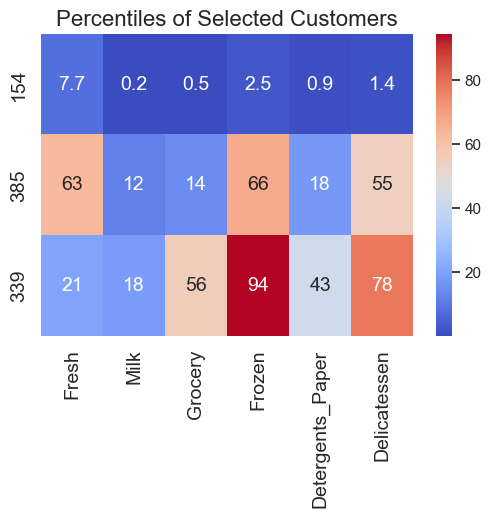

In [15]:
#Write code here
plt.figure(dpi=100)
sns.heatmap(percentiles, annot=True, cmap='coolwarm',annot_kws={"size": 14})
plt.title('Percentiles of Selected Customers', fontsize=16);
plt.xticks(fontsize=14);
plt.yticks(fontsize=14);

#### Question: What type of customers can you identify by looking into the heatmap?

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">From heatmap of the percentiles, we can identify some **patterns in their spending behavior** across the different product categories.</font>

> * <font face="Comic sans MS" size="3" color="blue">For index **232**, customer has a **high percentile** rank in the **Fresh** category but low percentiles in the other categories, this **may indicate** that they are a **restaurant** or food establishment that **primarily serves fresh produce**.  </font>

**Task 12: Find the corelation among all the variables of whole dataframe and describe the findings you infer from the heatmapt.**

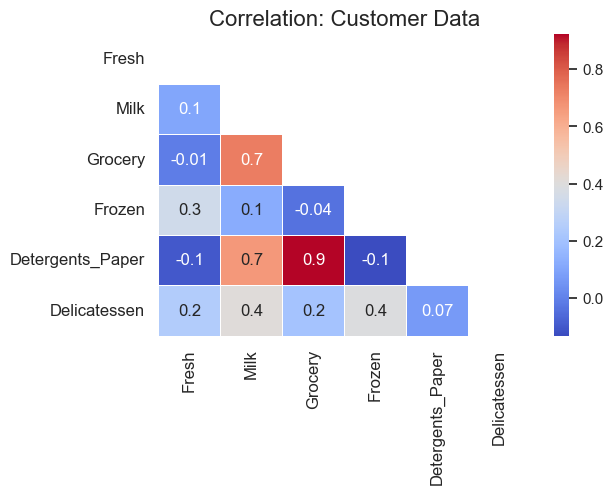

In [16]:
# Write the code here
plt.figure(dpi=100)
plt.title('Correlation: Customer Data', fontsize=16)
cor = df.corr()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

mask = np.zeros_like(cor,dtype=bool)
mask[np.triu_indices_from(mask)]=True
cor[mask]=np.nan

sns.heatmap(cor, annot=True, fmt='.1g',linewidth=.5,cmap="coolwarm",linecolor='white');


### Pair Plot

Pairplot is a plot which is used to give and over view of the data in a graphical grid form. The result it shows gives us a picture of variables themselves in a graphical way as well as a relationship of one variable with all the others. For more details you can [click here](https://seaborn.pydata.org/generated/seaborn.pairplot.html)

**Task 13: Make a pairplot using seaborn.**

<Figure size 4000x4000 with 0 Axes>

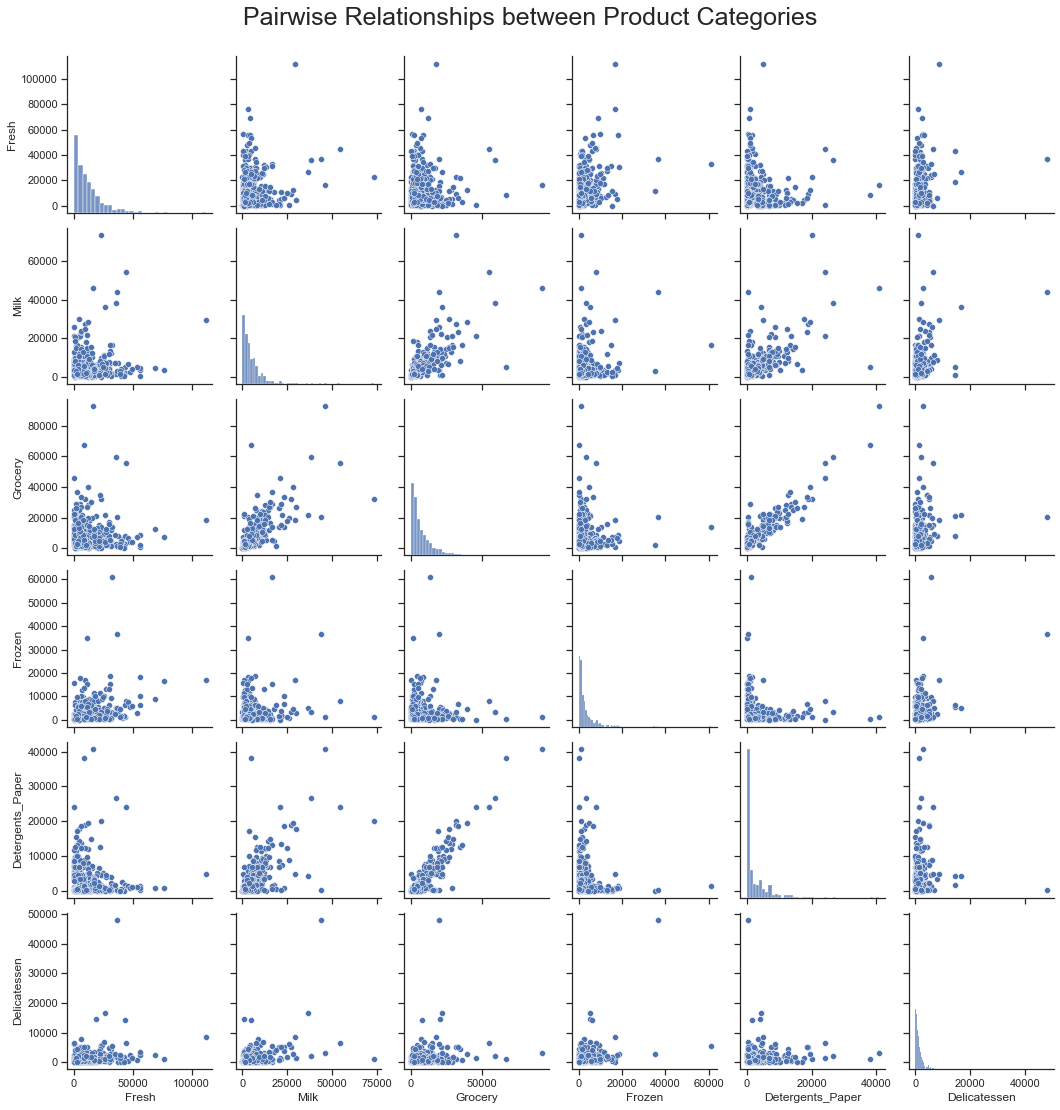

In [17]:
# write code here
#plt.subplots(dpi=100)
ax = plt.figure(dpi=200,figsize=(20,20));
sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(df);
ax.fig.suptitle("Pairwise Relationships between Product Categories", y=1.03, fontsize=25);

**Question: What findings do you get from the above plot? Describe in terms of skewned/normal form by looking at each variable and also look for any outliers that can be visually identified in the plot.**

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">  First of all if we look at **distibution plots on diagnol** we can cross verify our assesments which we made while looking at summary statistics that yes, **no attribute is showing normally distributed bell shape**. Insted, theya are all **postively skewed**. </font>

> * <font face="Comic sans MS" size="3" color="blue"> Further more, we can see **correlations** in scatter plots, there is **positive correlation** pattern between **Detergents_Paper and Grocery**, means those who bought Grocery, have also bught Detergents Paper with almost same ratio. **Milk** is also making good posiotive coraltion ternd with **Detergents_Paper and Grocery**.  </font>

> * <font face="Comic sans MS" size="3" color="blue"> Regarding **outliers**, yes we can see some out of trend plots in differetn statter plots, like there are some **extreme points** in scatter plot of **Frozen and Delicatessen**, and etc. we can check plots for outliers specifically in those plots where there is high corelation to treat them a bit but for outliers the best solutionis individual box plots.  </font>

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by normalizing it by **removing skewness** and **detecting (and optionally removing) outliers**. 

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data.

**Task 14: Apply log on data for transforming it from skewed to normalized form. Use function** `np.log()` **and save the result in** `log_data`

In [18]:
#Write code here
log_data = np.log(df)

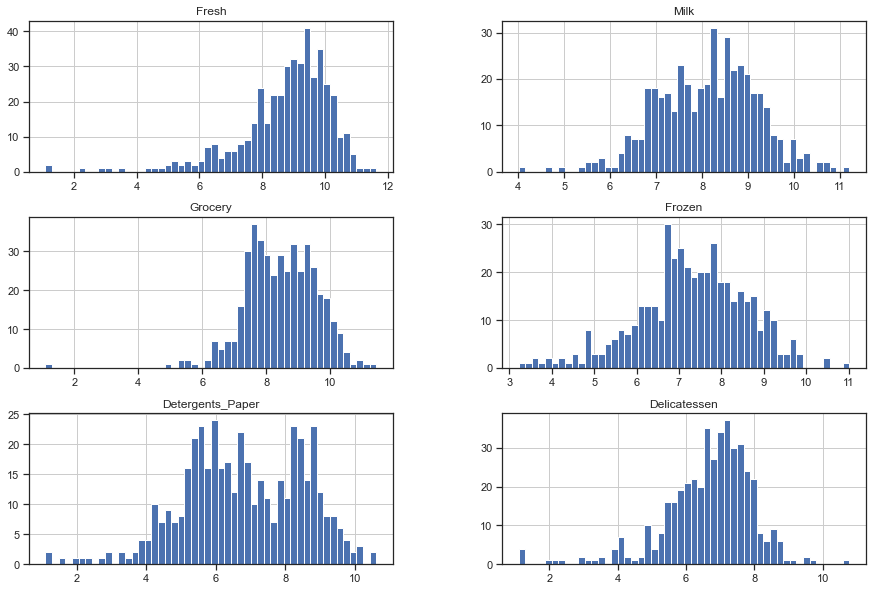

In [19]:
# additional step to check shapes

log_data.hist(figsize=(15, 10), bins=50);

# wow it, it has completly changed teh shapes. 

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to Q1. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to Q3. Again, use `np.percentile`.
 - Assign the calculation of an IQR for the given feature.
 - Query the data to filter out Outliers using IQR
 - remove data points from the dataset by adding indices to the outliers list

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points! 

Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [172]:
outliers=[]
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = log_data[feature].quantile(0.25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = log_data[feature].quantile(0.75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1)*1.5
    
    # Display the outliers
    print("Data points considered outliers for the feature '{}':".format(feature))
    out=log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    print(Q1 - step)
    display(out)
    outliers=outliers+list(out.index.values)
    
# Select the indices for data points you wish to remove
outliers = list(set([x for x in outliers if outliers.count(x) > 1]))    
print ("Outliers: {}".format(outliers))

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':
5.514550833608026


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.44,9.95,10.73,3.58,10.10,7.26
66,2.20,7.34,8.91,5.16,8.15,3.30
81,5.39,9.16,9.58,5.65,8.96,5.05
95,1.10,7.98,8.74,6.09,5.41,6.56
96,3.14,7.87,9.00,4.98,8.26,5.38
128,4.94,9.09,8.25,4.96,6.97,1.10
171,5.30,10.16,9.89,6.48,9.08,8.74
193,5.19,8.16,9.92,6.87,8.63,6.50
218,2.89,8.92,9.63,7.16,8.48,8.76
304,5.08,8.92,10.12,6.42,9.37,7.79


Data points considered outliers for the feature 'Milk':
5.016732967223546


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.04,11.21,10.38,6.89,9.91,6.81
98,6.22,4.72,6.66,6.80,4.03,4.88
154,6.43,4.01,4.92,4.32,1.95,2.08
356,10.03,4.90,5.38,8.06,2.20,6.31


Data points considered outliers for the feature 'Grocery':
5.2757599875759436


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.92,7.04,1.10,8.39,1.10,6.88
154,6.43,4.01,4.92,4.32,1.95,2.08


Data points considered outliers for the feature 'Frozen':
4.260350248162942


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.43,9.66,9.72,3.50,8.85,6.07
57,8.60,9.20,9.26,3.64,8.93,7.16
65,4.44,9.95,10.73,3.58,10.10,7.26
145,10.00,9.03,10.46,3.74,9.44,8.40
175,7.76,8.97,9.38,3.95,8.34,7.44
264,6.98,9.18,9.65,4.11,8.70,7.14
325,10.40,9.73,9.52,11.02,7.15,8.63
420,8.40,8.57,9.49,3.22,8.83,7.24
429,9.06,7.47,8.18,3.85,4.43,7.82
439,7.93,7.44,7.83,4.17,6.17,3.95


Data points considered outliers for the feature 'Detergents_Paper':
1.4587426638529708


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.92,7.04,1.10,8.39,1.10,6.88
161,9.43,6.29,5.65,7.00,1.10,7.71


Data points considered outliers for the feature 'Delicatessen':
3.7695940025105954


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.20,7.34,8.91,5.16,8.15,3.30
109,7.25,9.72,10.27,6.51,6.73,1.10
128,4.94,9.09,8.25,4.96,6.97,1.10
137,8.03,9.00,9.02,6.49,6.58,3.58
142,10.52,8.88,9.02,8.00,3.00,1.10
154,6.43,4.01,4.92,4.32,1.95,2.08
183,10.51,10.69,9.91,10.51,5.48,10.78
184,5.79,6.82,8.46,4.30,5.81,2.40
187,7.80,8.99,9.19,8.74,8.15,1.10
203,6.37,6.53,7.70,6.15,6.86,2.89


Outliers: [128, 65, 66, 75, 154]


**Question**<br>
Are there any data points considered outliers for more than one feature based on the definition above? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why?

**Answer:**

**Task 15: Make a pairplot to check changes in data after pre-processing and using the** `good_data`

<Figure size 4000x4000 with 0 Axes>

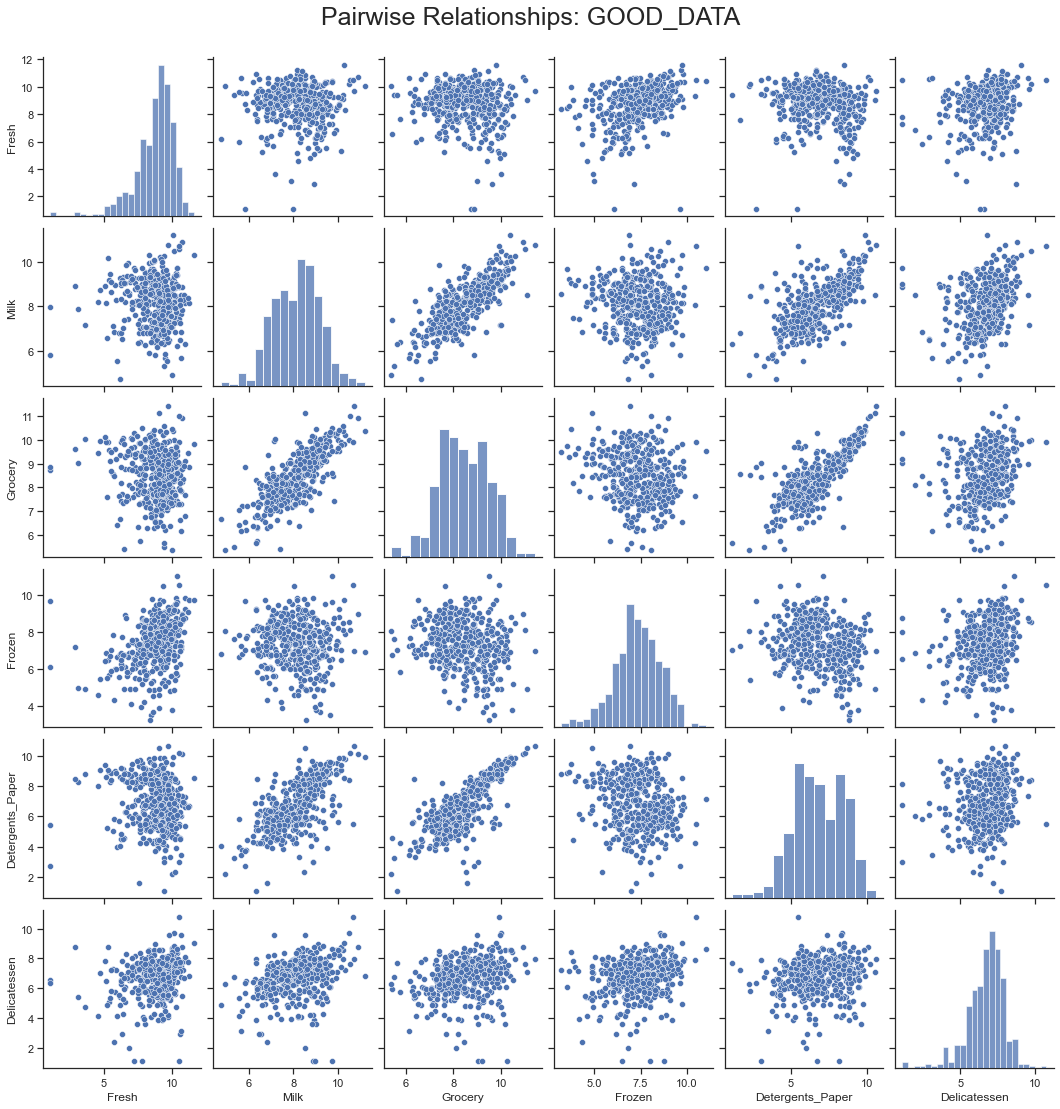

In [21]:
# write code here
#plt.subplots(dpi=100)
ax = plt.figure(dpi=200,figsize=(20,20));
sns.set(style="ticks", color_codes=True)
ax = sns.pairplot(good_data);
ax.fig.suptitle("Pairwise Relationships: GOOD_DATA", y=1.03, fontsize=25);

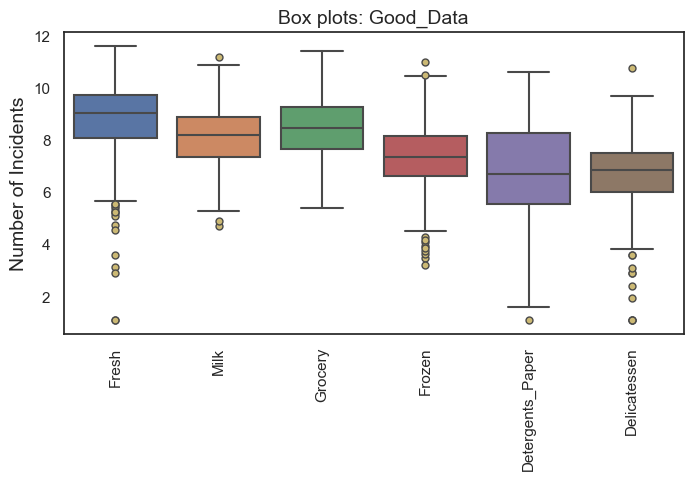

In [22]:
# additional check ! 
sns.set(style="white")

fig = plt.figure(figsize=(8,4), dpi=100)

sns.boxplot(data= good_data,
           flierprops={"marker": "o", 'markerfacecolor': 'y'})

plt.xticks(rotation=90);
plt.ylabel('Number of Incidents', fontsize=14);
plt.title('Box plots: Good_Data', fontsize=14);

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and 
 - Apply a PCA transformation of the good data.

**Task 16: Import PCA Library**

In [23]:
# Write your code here
from sklearn.decomposition import PCA

**Task 17: Apply PCA by fitting the good data with the same number of dimensions as features.**

In [24]:
# Write your code here
pca_ = PCA(n_components=6)


In [25]:
# Write your code here
pca_.fit(good_data)

PCA(n_components=6)

In [26]:
# Generate PCA results plot
import renders as rs
pca_results = rs.pca_results(good_data, pca_)
pca_results

,Explained Variance,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.44,0.17,-0.40,-0.44,0.18,-0.75,-0.15
Dimension 2,0.26,-0.69,-0.17,-0.07,-0.50,-0.04,-0.49
Dimension 3,0.12,-0.68,0.04,-0.02,0.32,-0.21,0.63
Dimension 4,0.10,-0.20,0.01,0.06,0.79,0.21,-0.54
Dimension 5,0.05,-0.00,0.72,0.36,-0.03,-0.56,-0.21
Dimension 6,0.02,0.03,-0.54,0.82,0.02,-0.18,0.02


**Task 18: Find cumulative explained variance**

In [27]:
# Write the code here
cumsum_pca_results= np.cumsum(pca_.explained_variance_ratio_)
cumsum_pca_results

array([0.44302505, 0.70681723, 0.82988103, 0.93109011, 0.97959207,
       1.        ])

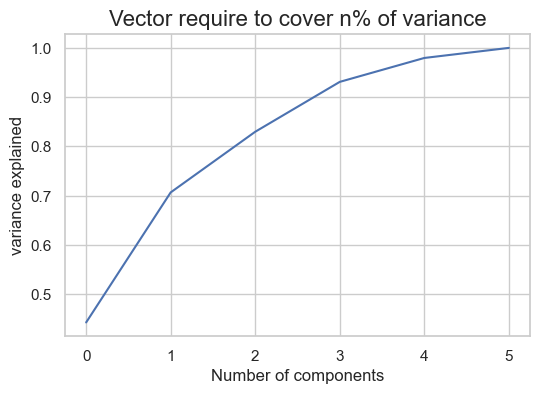

In [28]:
sns.set(style="whitegrid")
plt.figure(dpi=100)
expl=pca_.explained_variance_ratio_
cdf=[sum(expl[:i+1]) for i in range(len(expl))]
plt.plot(range(len(expl)), cdf);
plt.title('Vector require to cover n% of variance', fontsize=16);
plt.ylabel('variance explained');
plt.xlabel('Number of components');
sns.set(style="white")

**Question**
How much variance in the data is explained ***in total*** by the first and second principal component? What about the first four principal components? How many components should be selected for reducing the dimensions? Give your answer along with the reason.

### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">**Variance** covered by the **first and second principal component** = $0.707$ or $70.7\%$  </font>

> * <font face="Comic sans MS" size="3" color="blue">**Variance** covered by the **first four principal component** = $0.931$ or $93.1\%$  </font>

> * <font face="Comic sans MS" size="3" color="blue">The **number of components** to select for reducing the dimensions depends on that **how much variance** we want to retain? **Based on the plot**, it appears that the marginal increase in explained variance levels off at around **3 components**. Therefore, we could select 3 components    </font>

### Implementation: Dimensionality Reduction
In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the results to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

**Task 19: Apply PCA by fitting the good data with the selected number of components**

In [167]:
# write your code here
pca = PCA(n_components=3)

**Task 20: Transform the good data using the PCA fit above**

In [168]:
# write your code here
reduced_data = pca.fit(good_data)

**Task 21: Create a DataFrame for the reduced data**

In [169]:
# write your code here
reduced_data = pd.DataFrame(pca.transform(good_data), columns=['PC1', 'PC2', 'PC3'])
reduced_data

,PC1,PC2,PC3
0,-1.76,0.01,-0.96
1,-1.79,-0.81,0.23
2,-1.88,-1.60,1.32
3,1.16,-1.41,0.54
4,-0.78,-2.39,0.48
...,...,...,...
430,0.64,-2.86,0.64
431,3.18,-1.94,0.27
432,-3.74,-0.86,-0.99
433,1.67,-0.40,0.52


## Implementation: Creating Clusters

In this section, you will choose to use either a K-Means clustering algorithm  and hierarchical clustering to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

## Choosing K

**Before Implementing KMeans and hierarchical clustering, choose the optimal K using the following method**

- Silhouette Score
- Elbow Method

### Silhouette Score for K-Means

In [32]:
# Import necessary libraries
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Task 22-a: Check Silhouette Score for finding Optimal K**

In [33]:
# write your code here
scores = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    score = silhouette_score(reduced_data, kmeans.labels_)
    scores.append(score)
    print(f"For K = {k}, Silhouette Score = {score}")

For K = 2, Silhouette Score = 0.36879128989640114
For K = 3, Silhouette Score = 0.33098351812167626
For K = 4, Silhouette Score = 0.25526104788108683
For K = 5, Silhouette Score = 0.2746055254253469
For K = 6, Silhouette Score = 0.289907741232846
For K = 7, Silhouette Score = 0.2641868370405601
For K = 8, Silhouette Score = 0.26565048476679254
For K = 9, Silhouette Score = 0.27740884822509343
For K = 10, Silhouette Score = 0.2794680198822278


**Task 23-a: Plot a graph representing the Silhouette Score.**

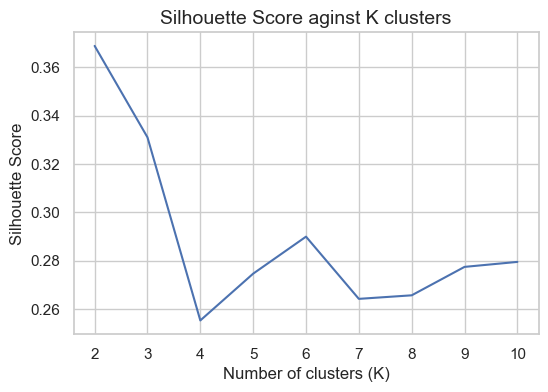

In [34]:
#add plot
plt.figure(dpi=100)
sns.set(style="whitegrid")
plt.plot(range(2, 11), scores)
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
#plt.yticks(np.arange(0.30, 0.52, 0.02))
plt.title('Silhouette Score aginst K clusters',fontsize=14);

**Task 22-b: Apply Elbow Method for finding Optimal K**

In [35]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

sse = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(reduced_data)
    sse.append(kmeans.inertia_)

print(sse)

[3698.0940244781837, 2279.750787520122, 1835.377842426807, 1549.436397761636, 1350.192873429281, 1187.442907600667, 1077.1258730355237, 977.3357057580802, 902.1431312545884, 838.3413197363169]


**Task 23-b: Plot a graph representing the Elbow Method.**

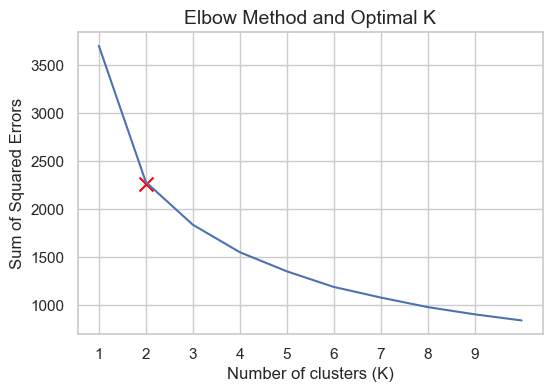

In [132]:
#add plot
plt.figure(dpi=100);
plt.scatter(2, 2260, color='red', s=100, marker='x') # manual work, can be automated, may be !
plt.plot(range(1, 11), sse);

plt.xlabel('Number of clusters (K)');
plt.ylabel('Sum of Squared Errors');
plt.xticks(np.arange(1,10,1));
#plt.yticks(np.arange(1500,4750,250));
plt.title('Elbow Method and Optimal K', fontsize=14);

## Implementation of K-Means

**Task 24: Implement KMeans using your choosen K**

In [37]:
# write your code here
from sklearn.cluster import KMeans
kmean = KMeans(n_clusters=2)
kmean.fit(reduced_data)

KMeans(n_clusters=2)

In [38]:
# write your code here
preds = kmean.labels_

## Implementation Hierarchical Clustering

**Task 25: Implement Hierarchical(agglomerative) clustering using your choosen K**

In [135]:
# write your code here

from sklearn.cluster import AgglomerativeClustering
a_cluster = AgglomerativeClustering(n_clusters=2)

In [136]:
# write your code here
preds_agg = a_cluster.fit_predict(reduced_data)

## Best Clustering Algorithm?

**You will be using** `adjusted rand index` **to select the best clustering algorithm by comparing each of the calculated labels with actual labels found in** `data['Channel]` . Before calculating the score, we need to make sure that the shape of true labels is consistent with the resultant labels.

In [41]:
true_labels = data['Channel'].drop(data['Channel'].index[outliers]).reset_index(drop = True)
true_labels.unique()

array([2, 1], dtype=int64)

**Task 26: Find the adjusted rand index for K-Means and Agglomerative Clustering**

In [42]:
# Import necessary libraries
from sklearn.metrics import adjusted_rand_score

In [149]:
kmeans_score = adjusted_rand_score(true_labels, preds)
print (f'The score for Kmeans is {kmeans_score:.3f}')

The score for Kmeans is 0.612


In [150]:
aggl_score = adjusted_rand_score(true_labels, preds_agg)
print (f'The score for Agglomerative Clustering is {aggl_score:.3f}')

The score for Agglomerative Clustering is 0.647


**Question: Which has the best score and should be selected?**

##### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">**Higher** score is **better**, indicating better agreement between the predicted clusters and the true labels, Agglomerative Clustering (0.647) is higher,Therefore, **Agglomerative Clustering should be selected over K-Means.**   </font>

## Visualizing the clusters

**Task 27: Get the centers for KMeans**

In [54]:
# Write code here
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(reduced_data)

centers = kmeans.cluster_centers_
centers

array([[-2.17903101,  0.20563487, -0.08801917],
       [ 1.4807315 , -0.13973644,  0.05981226]])

In [113]:
#rs.cluster_results(reduced_data, preds, centers) not working 

# Profiling

In [70]:
df_pred = df.drop(df.index[outliers]).reset_index(drop = True)
df_pred['pred'] = preds

**Task 28: Get the average prices for each category from the original data frame for each cluster and then make a profile for each**

In [107]:
# write the code here
clustered_avg = df_pred.groupby('pred').mean().reset_index()
clustered_avg

,pred,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,0,8847.60,9970.04,14693.76,1597.22,6342.17,1786.41
1,1,14292.27,2946.32,3302.13,4114.69,474.38,1367.18


**Task 29: Make a radar chart to show a better profile for each cluster.**

In [76]:
# Write the code to import the library files for plotly and set your credentials
#library
import chart_studio.plotly as py
import plotly.graph_objs as go

# for credentials
import configparser
config = configparser.ConfigParser()
config.read('config.ini')

plotly_username = config['plotly']['username']
plotly_api_key = config['plotly']['api_key']

In [86]:
import chart_studio
chart_studio.tools.set_credentials_file(username=plotly_username, api_key= plotly_api_key)

**Task 30: Make the data set for radar chart**

In [103]:
# Write your code here
radar_data = [
    go.Scatterpolar(
      r = list(clustered_avg.loc[0,["Fresh", "Milk","Grocery","Frozen","Detergents_Paper", "Delicatessen"]]),
      theta = ["Fresh", "Milk","Grocery","Frozen","Detergents_Paper", "Delicatessen"],
      fill = None,
      fillcolor=None,
      name = 'Cluster 0'
    ),
    go.Scatterpolar(
      r = list(clustered_avg.loc[1,["Fresh", "Milk","Grocery","Frozen","Detergents_Paper", "Delicatessen"]]),
      theta = ["Fresh", "Milk","Grocery","Frozen","Detergents_Paper", "Delicatessen"],
      fill = None,
      fillcolor=None,
      name = 'Cluster 1'
    )
]

**Task 31: Set the layout for your radar chart and plot it**

In [120]:
# Write your code here
radar_layout = go.Layout(polar = dict(radialaxis = dict(visible = True,range = [0, 16000])), showlegend = True)

In [110]:
# add plot
fig = go.Figure(data=radar_data, layout=radar_layout)
py.iplot(fig, filename = "radar")

#### <u>Clink [HERE](https://plotly.com/~pp_plots69/5/) to see interactive plot in new tab.</u>
![Alt Text](https://i.imgur.com/EV6NzED.jpeg)   

**Question: What can you infer from the above plot? Explain in detail**

##### ANSWER:
> * <font face="Comic sans MS" size="3" color="blue">We can see that customers are grouped in **two segments**, one are those who purchase **more grocery**, more milk but comparatively **less Fresh items**, these can be **retailers/super markets**. while other segment is of those customers who buy **more fresh** items less milk quantity, **less frozen** items. they can be **Restaurants/Cafes** as they would like to sell **fresh food**.  </font>

## Conclusion

In this final section, you will investigate ways that you can make use of the clustered data. First, you will consider how the different groups of customers, the ***customer segments***, may be affected differently by a specific delivery scheme. Next, you will consider how giving a label to each customer (which *segment* that customer belongs to) can provide for additional features about the customer data. Finally, you will compare the ***customer segments*** to a hidden variable present in the data, to see whether the clustering identified certain relationships.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

In [171]:
# Display the clustering results based on 'Channel' data
#import renders as rs
#rs.channel_results(reduced_data, outliers)


**Question:**
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

**Answer:**